# Feather Engineering & Prediction

In [32]:
# Dependence
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')     # ignore the version warning

## Part 1:  Data Preparetion

In [33]:
# Step 1: Load the Data

# Load the dataset
data_url = "./source/austinHousingData.csv"
feather_data = pd.read_csv(data_url, encoding='utf-8')

# View basic information of the data
# feather_data.info()
# feather_data.describe()
feather_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [34]:
# Step 2: Data Cleaning
# Check missing values
missing_data= feather_data.isnull().sum()
print(missing_data[missing_data > 0])     # The description has little impact on the analysis results, so it will not be deleted.

description    2
dtype: int64


In [35]:
# Convert data types if necessary
feather_data['zipcode'] = feather_data['zipcode'].astype(str)
print(feather_data.dtypes)

zpid                            int64
city                           object
streetAddress                  object
zipcode                        object
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [36]:
# Delete unnecessary columns
feather_data.drop(columns=['zpid', 'streetAddress', 'description', 'latest_saledate', 'latestPriceSource', 'homeImage'], inplace=True)
feather_data.dtypes

city                           object
zipcode                        object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowF

In [37]:
# Step 3: Features related to processing time
# Example of creating new features

# create new column: house_age
feather_data['house_age'] = feather_data['latest_saleyear'] - feather_data['yearBuilt']

# Delete 'latest_saleyear', 'yearBuilt'
feather_data.drop(columns=['latest_saleyear', 'yearBuilt'], inplace=True)

feather_data.info

<bound method DataFrame.info of                city zipcode   latitude  longitude  propertyTaxRate  \
0      pflugerville   78660  30.430632 -97.663078             1.98   
1      pflugerville   78660  30.432673 -97.661697             1.98   
2      pflugerville   78660  30.409748 -97.639771             1.98   
3      pflugerville   78660  30.432112 -97.661659             1.98   
4      pflugerville   78660  30.437368 -97.656860             1.98   
...             ...     ...        ...        ...              ...   
15166        austin   78748  30.161997 -97.816345             1.98   
15167        austin   78741  30.240223 -97.772835             1.98   
15168        austin   78704  30.244835 -97.761124             1.98   
15169        austin   78722  30.281569 -97.717789             1.98   
15170        austin   78702  30.276930 -97.701523             1.98   

       garageSpaces  hasAssociation  hasCooling  hasGarage  hasHeating  ...  \
0                 2            True        True 

In [38]:
# Code Category Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#  Code Category Variable
le = LabelEncoder()
feather_data['homeType'] = le.fit_transform(feather_data['homeType'])

# Perform OneHot Encoding on city and zipcode
feather_data = pd.get_dummies(feather_data, columns=['city', 'zipcode'])

# Summary statistics
# feather_data.describe()
feather_data.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'homeType', 'parkingSpaces', 'latestPrice',
       'numPriceChanges', 'latest_salemonth', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'house_age', 'city_austin',
       'city_del valle', 'city_driftwood', 'city_dripping springs',
       'city_manchaca', 'city_manor', 'city_pflugerville', 'city_road',
       'city_west lake hills', 'zipcode_78617'

In [39]:
# Create price per square foot feature
feather_data['price_per_sqft'] = feather_data['latestPrice'] / feather_data['livingAreaSqFt']

In [40]:
# Standardized numerical features
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['propertyTaxRate', 'garageSpaces', 'parkingSpaces', 'numPriceChanges', 'numOfPhotos','lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',  'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'house_age', 'price_per_sqft']

# Standardized numerical features
scaler = StandardScaler()
feather_data[numerical_features] = scaler.fit_transform(feather_data[numerical_features])


In [41]:
# Separate features and target variable
X = feather_data.drop(columns=['latestPrice'])
y = feather_data['latestPrice']

# Data Preview
print(X.head())
print(y.head())

    latitude  longitude  propertyTaxRate  garageSpaces  hasAssociation  \
0  30.430632 -97.663078        -0.265248      0.570097            True   
1  30.432673 -97.661697        -0.265248      0.570097            True   
2  30.409748 -97.639771        -0.265248     -0.909113            True   
3  30.432112 -97.661659        -0.265248      0.570097            True   
4  30.437368 -97.656860        -0.265248     -0.909113            True   

   hasCooling  hasGarage  hasHeating  hasSpa  hasView  ...  zipcode_78750  \
0        True       True        True   False    False  ...          False   
1        True       True        True   False    False  ...          False   
2        True      False        True   False    False  ...          False   
3        True       True        True   False    False  ...          False   
4        True      False        True   False    False  ...          False   

   zipcode_78751  zipcode_78752  zipcode_78753  zipcode_78754  zipcode_78756  \
0          F

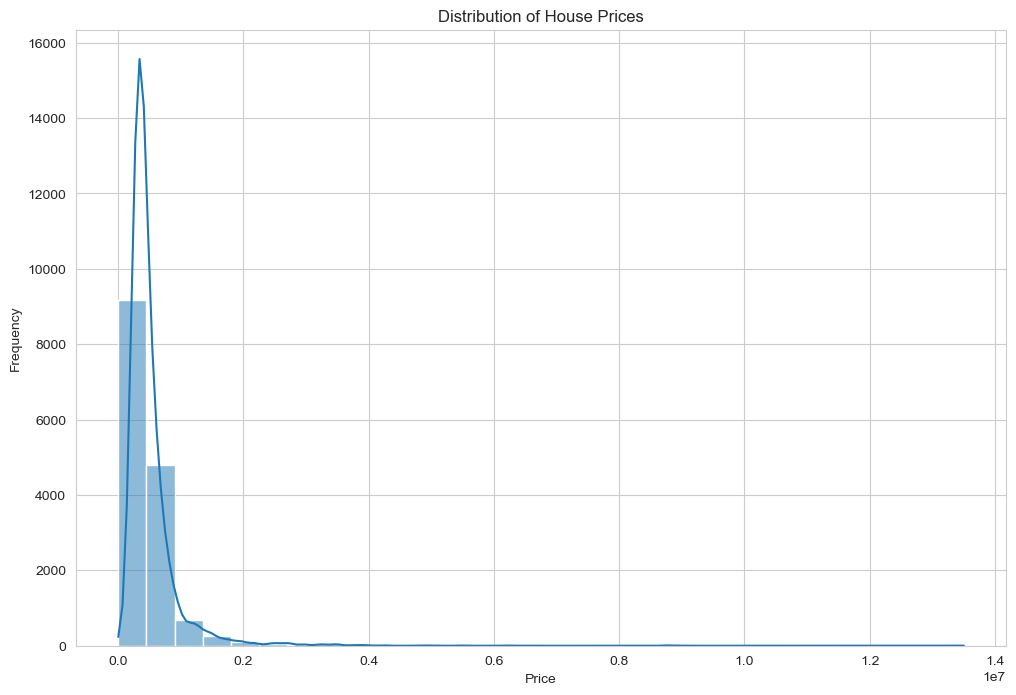

In [42]:
# Step 4: Data Exploration
sns.set_style("whitegrid")

# Distribution of house prices
plt.figure(figsize=(12, 8))
sns.histplot(feather_data['latestPrice'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Observation and Analysis

- **Concentrated Distribution**: Most house prices are concentrated in the lower price range, especially between 0 to 2 million.
- **Right-Skewed Distribution**: The house price data shows a right-skewed distribution, meaning that a few extremely high-priced houses have raised the overall distribution.
- **Outliers**: The chart shows some extremely high-priced houses (over 4 million), which are relatively few in number.

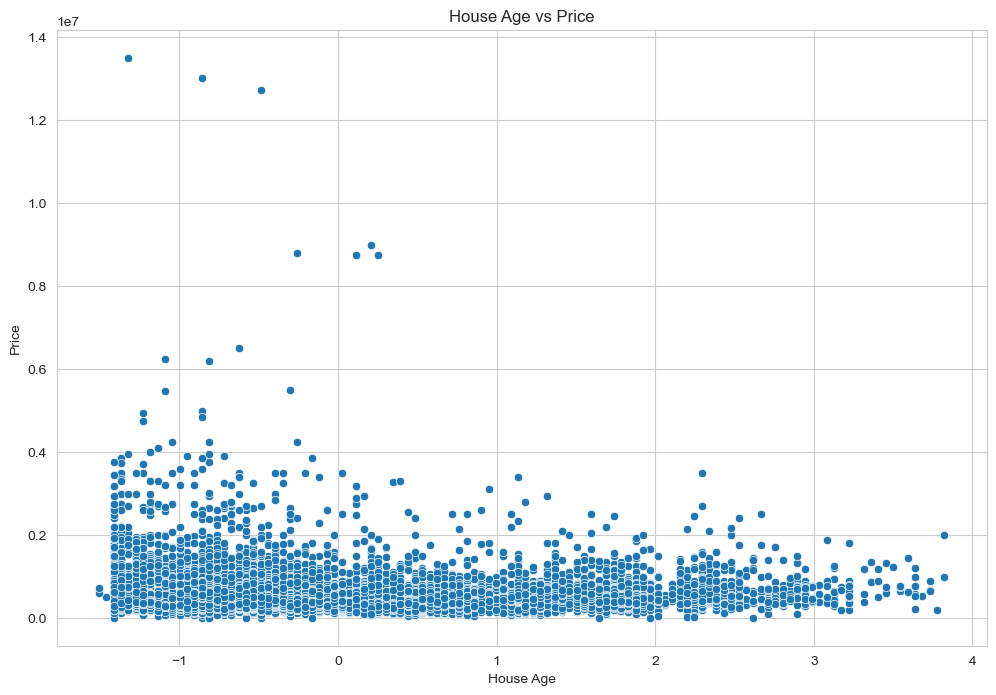

In [43]:
# Relationship between house age and price
plt.figure(figsize=(12, 8))
sns.scatterplot(data=feather_data, x='house_age', y='latestPrice')
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.show()

#### Observation and Analysis

- **Negative Correlation**: The chart shows a negative correlation between house age and price. As the house age increases, the price decreases. This means that newer houses generally have higher prices, while older houses have lower prices.
- **Outliers**: There are some outliers in the chart, especially in the high-price area. These points may represent a very small number of extremely expensive houses, requiring further analysis of these specific outliers.
- **Data Distribution**: Most houses are concentrated in low-price and short-term use areas, which may be related to market demand and supply.

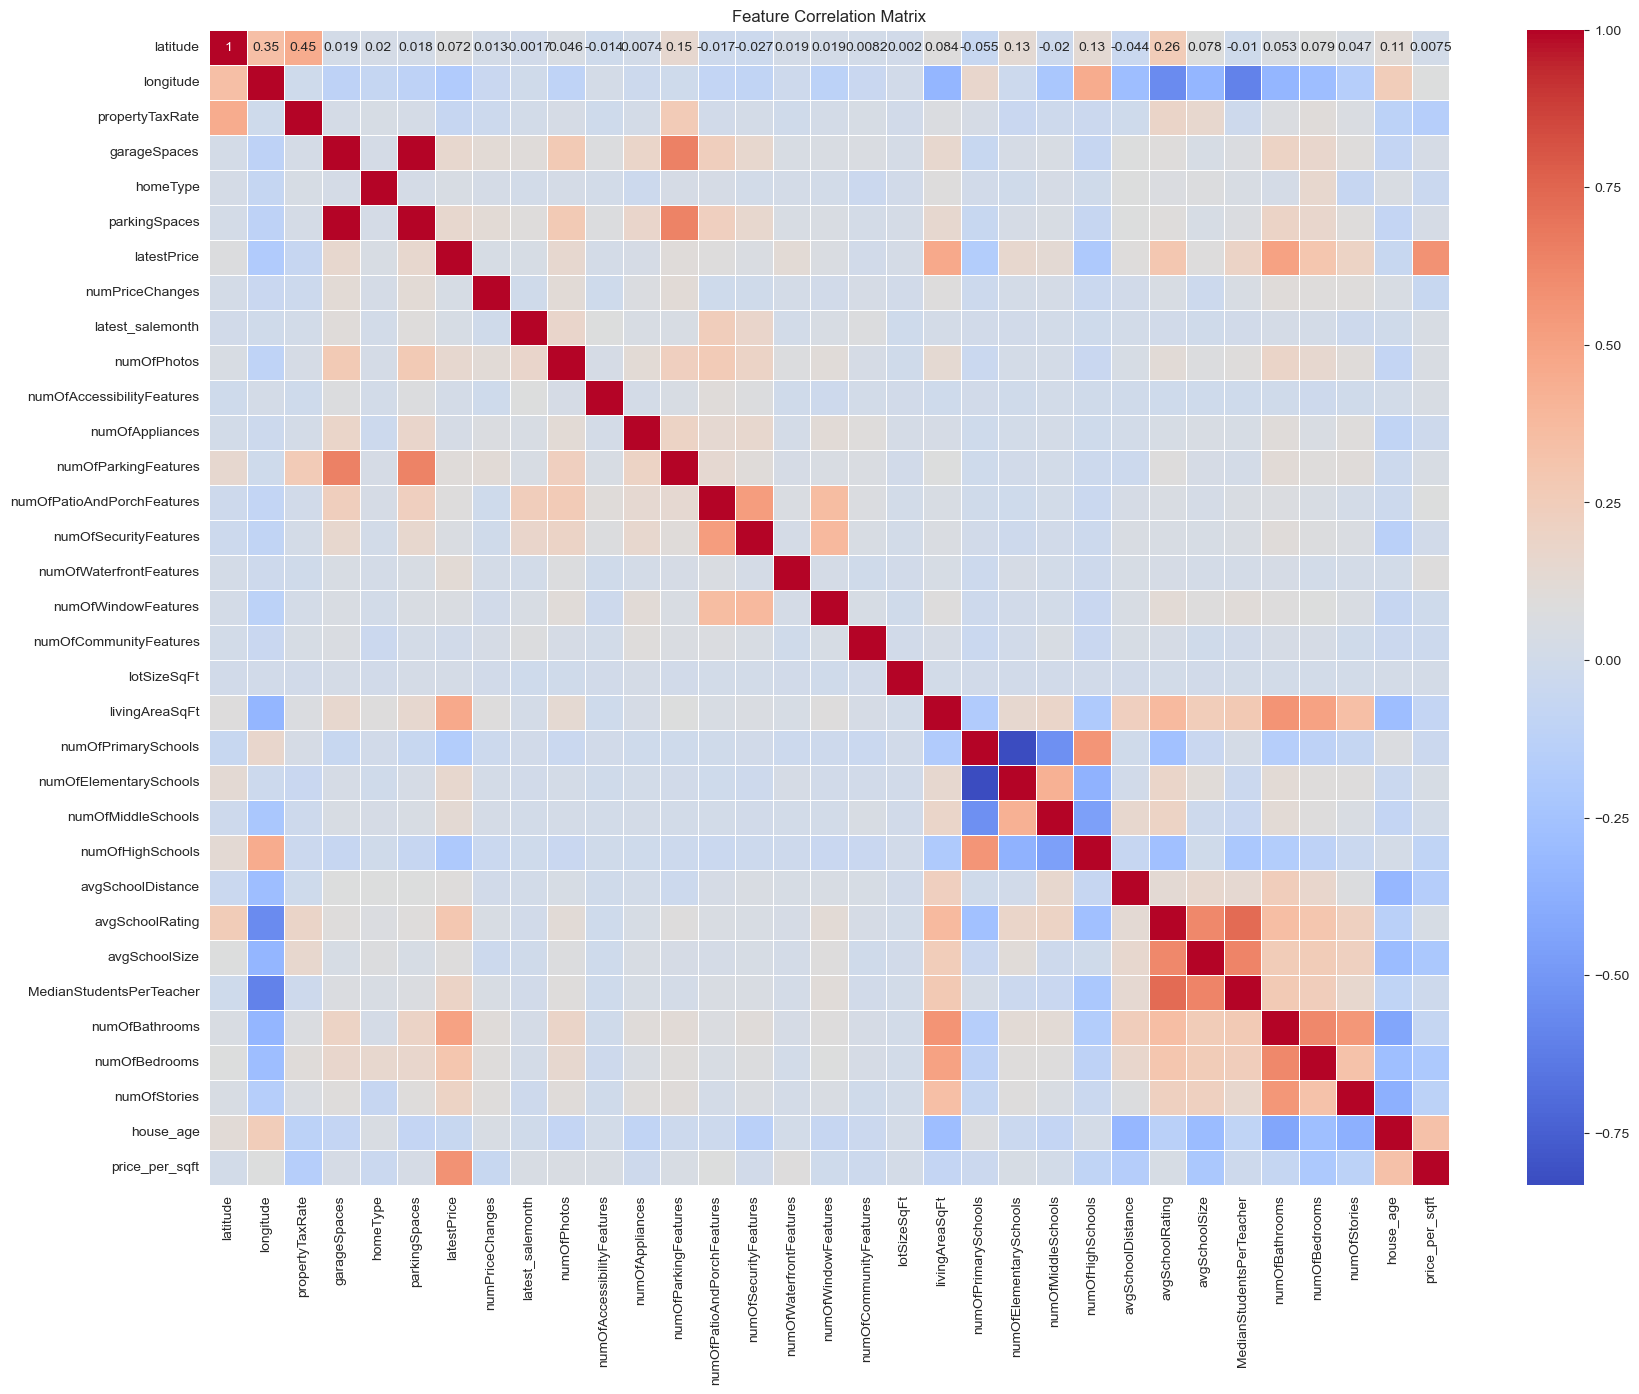

latestPrice                   1.000000
price_per_sqft                0.576071
numOfBathrooms                0.504738
livingAreaSqFt                0.467034
numOfBedrooms                 0.299839
avgSchoolRating               0.293101
numOfStories                  0.200555
MedianStudentsPerTeacher      0.198208
garageSpaces                  0.157443
parkingSpaces                 0.156811
numOfElementarySchools        0.155988
numOfPhotos                   0.154355
numOfMiddleSchools            0.127838
numOfWaterfrontFeatures       0.123979
numOfParkingFeatures          0.098384
avgSchoolDistance             0.094156
numOfPatioAndPorchFeatures    0.087936
avgSchoolSize                 0.085167
latitude                      0.071547
numOfSecurityFeatures         0.058349
numOfWindowFeatures           0.056141
homeType                      0.046940
numPriceChanges               0.038305
latest_salemonth              0.033898
numOfAppliances               0.033114
lotSizeSqFt              

In [44]:
# Feature Correlation Analysis

# Select numeric columns
numeric_data = feather_data.select_dtypes(include=[np.number])

# Build corr_matrix
corr_matrix = numeric_data.corr()

# build heat map
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.savefig('./outputs/corr_matrix.png')
plt.show()

# Print the features most correlated with the target variable (house prices)
print(corr_matrix['latestPrice'].sort_values(ascending=False))


#### Observations and Analysis

- **Highest Correlation**: The highest correlation is between `price_per_sqft` and `latestPrice`, indicating a strong positive relationship between property price and price per square foot.
- **Highly Correlated Features**: Besides `price_per_sqft`, other features highly correlated with `latestPrice` include `numOfBathrooms`, `livingAreaSqFt`, `numOfBedrooms`, `avgSchoolRating`, and `numOfStories`.
- **Negative Correlation**: Some features such as `longitude`, `numOfPrimarySchools`, and `numOfHighSchools` have a negative correlation with 'latestPrice', suggesting that an increase in these features may lead to lower property prices.
- **Multicollinearity**: Some features also show high inter-correlation, such as 'numOfElementarySchools' and 'numOfPrimarySchools', which could cause multicollinearity issues that need attention during modeling.

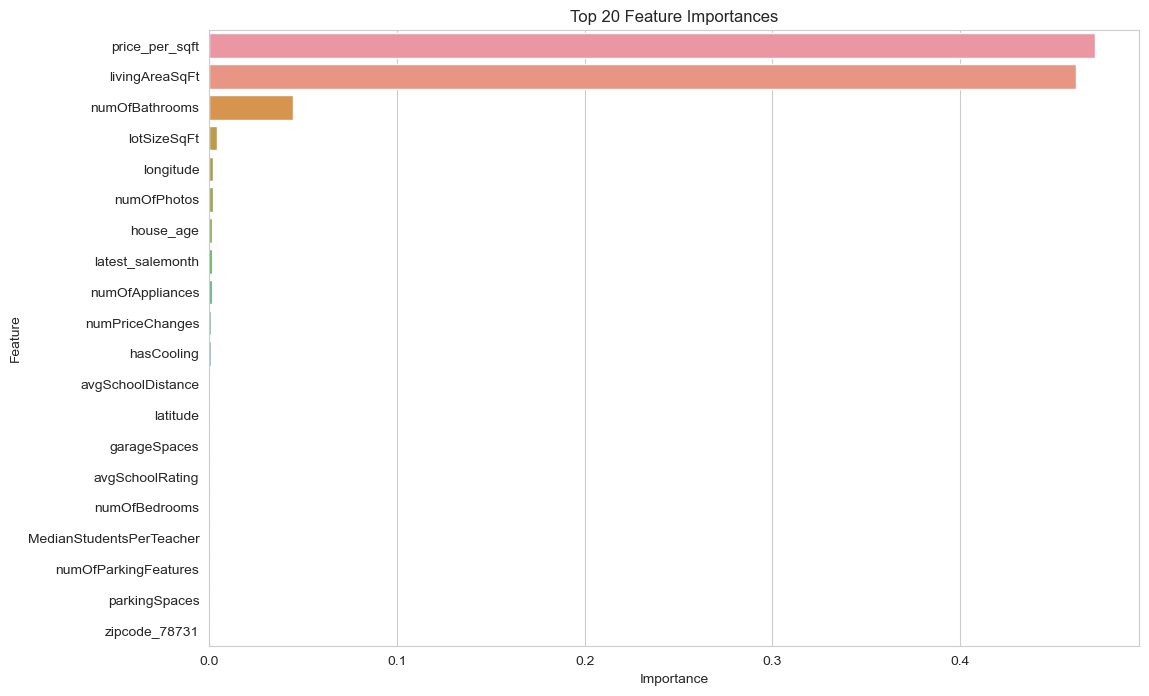

In [45]:
# Feature Importance Analysis

from sklearn.ensemble import RandomForestRegressor

# Calculate feature importance using the random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtain feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Build a bar chart to visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.savefig('./outputs/top_20_feature_importance.png')
plt.show()


## Part 2: Linear Regression Model Prediction

### Evaluation of Model Results

1. Mean Squared Error (MSE):
• MSE is the average of the squares of the differences between predicted and actual values. The smaller the MSE value, the higher the prediction accuracy of the model.
• Your MSE value is relatively large, indicating that the model's prediction accuracy is low.

2. Coefficient of Determination (R² Score):
• The R² value represents how well independent variables explain variations in dependent variables, with a range from [0, 1].
• Your R² value is 0.432, indicating that the model can only explain 43.2% of house price variations, which suggests that the model's predictive ability is low.

Mean Squared Error (Linear Regression): 62834672027.49096
R² Score (Linear Regression): 0.7345099454782389


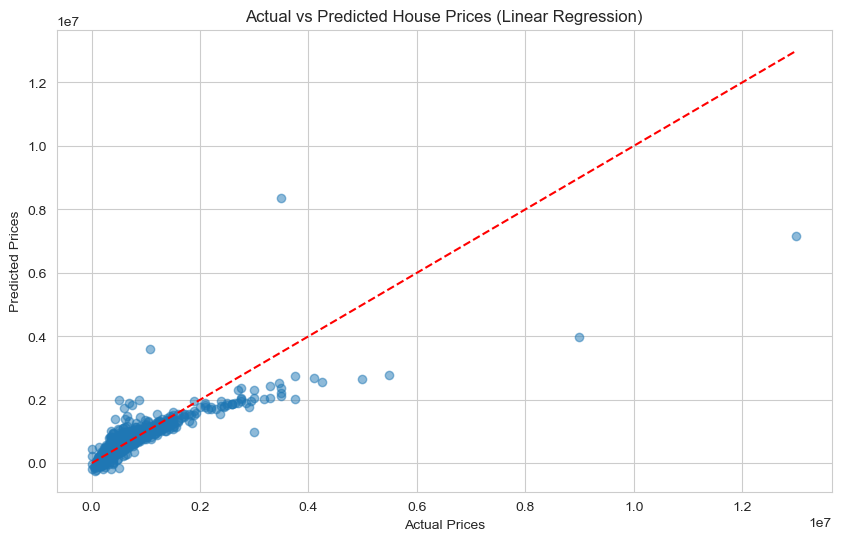

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select the most important feature
selected_features = feature_importance_df['Feature'].head(20).tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Tranning the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test_selected)

# Evaluate the prediction
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error (Linear Regression): {mse_lr}')
print(f'R² Score (Linear Regression): {r2_lr}')

# Plot a comparison chart of actual values and predicted values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.show()

#### Observation and Analysis

1. **Mean Squared Error (MSE)**: 62834672027.49096, indicating a significant error between the predicted values and the actual values.

2. **R² Score**: 0.7345099454782389, suggesting that the model explains approximately 73.45% of the variance in house prices, showing some explanatory power but still room for improvement.

3. **Actual vs Predicted Values Plot**: Most points are distributed along the diagonal line, but there are some points with large deviations in the high-price range, indicating that the model is not very accurate in predicting high-priced houses.


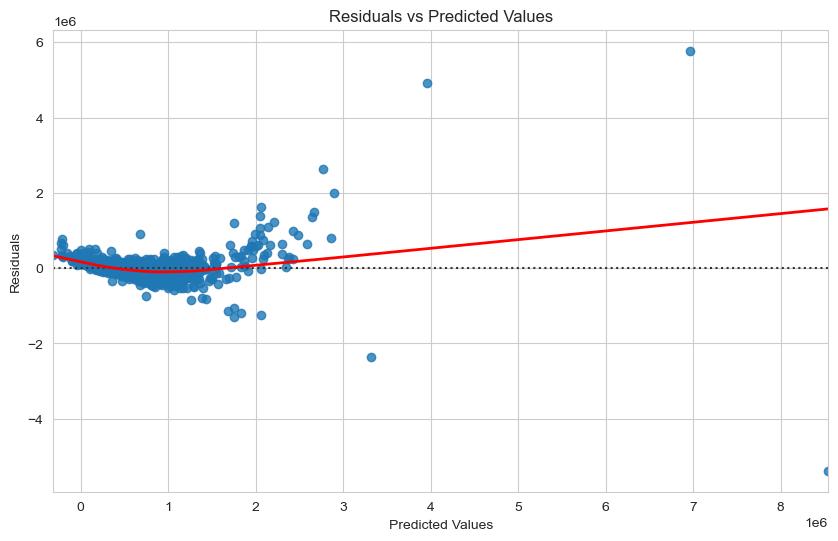

In [48]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### Observation and Analysis

- **Patterns and Trends**: The residual plot shows the differences between predicted values and actual values. Ideally, the residuals should be randomly distributed around the zero line without showing obvious patterns or trends. In the graph, residuals show a certain pattern in the range of smaller predicted values, indicating that there may be systematic bias in these areas.
- **Heteroscedasticity**: The scatter of points in the residual plot gradually increases, indicating that as predicted values increase, the variability of residuals also increases. This is known as heteroscedasticity. It means that the model is unstable when predicting higher house prices.
- **Model Fit**: If residuals are evenly distributed and fluctuate around the zero line, it indicates good model fit to data. The distribution of residuals in this graph is not completely random, suggesting that the model may fail to capture some complexities of data in certain areas.

## RandomForest Model

Mean Squared Error (Best Random Forest): 36983731834.62773
R² Score (Best Random Forest): 0.8437357486819116


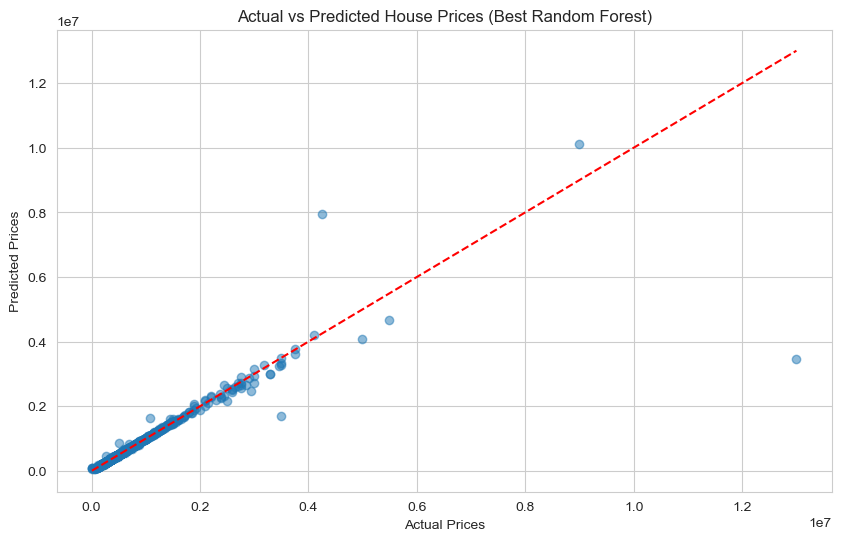

In [49]:
# Random Forest Model with Optimal Training Parameters
best_rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, bootstrap=True, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Prediction
y_pred_best_rf = best_rf_model.predict(X_test_selected)

# Evaluate Model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Mean Squared Error (Best Random Forest): {mse_best_rf}')
print(f'R² Score (Best Random Forest): {r2_best_rf}')

# Plot a comparison chart of actual values and predicted values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices (Best Random Forest)')
plt.show()


#### Observation and Analysis

1. **Mean Squared Error (MSE)**:

    - The MSE of the tuned random forest model is 36983731834.6277336983731834.6277336983731834.62773, indicating the average squared difference between predicted and actual house prices.
    - Compared to the linear regression model's MSE of 62834672027.4909662834672027.4909662834672027.49096, the random forest model's MSE is significantly lower, suggesting better predictive performance.

2. **R² Score**:

    - The R² score for the random forest model is 0.84373574868191160.84373574868191160.8437357486819116, meaning that the model can explain approximately 84.37% of the variance in house prices.
    - This score is higher than that of the linear regression model (0.7345099454782389), indicating a better fit to the data by the random forest model.

3. **Actual vs Predicted Plot**:

    - The plot shows a scatter diagram of actual versus predicted house prices with a red dashed line representing an ideal 1:1 relationship.
    - Most points are concentrated near this dashed line, indicating high prediction accuracy; however, there are some outliers in high-priced properties showing less accuracy in predicting extremely high-value houses.

4. **Conclusion**:

    - The random forest model demonstrates good predictive ability and accuracy in forecasting house prices with a higher R² score and lower MSE.
    - However, there are outliers particularly among high-priced properties where the model may not fully capture certain aspects of data; further optimization is recommended to improve prediction accuracy for these high-value houses.

### Summary

Compared to the linear regression model, the random forest model exhibits better predictive performance in forecasting house prices but could benefit from further optimization to handle outliers more effectively and enhance predictions for high-value properties.


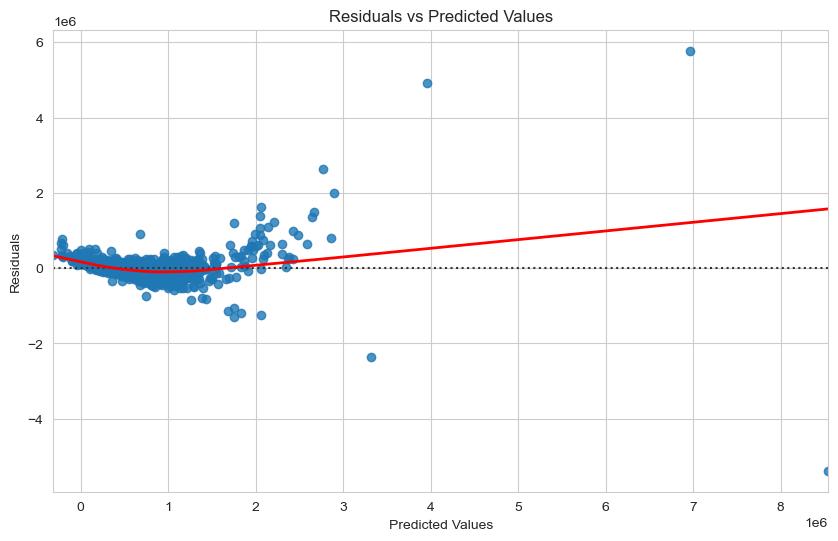

In [50]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### Observation and Analysis

1. **Residual Trend:** The residual values in the scatter plot are distributed around the zero axis, but there are some deviations in high-priced house predictions.
2. **Systematic Error:** The red trend line shows systematic errors, especially in the high-price segment where predicted values are higher.
3. **Model Performance:** The scatter plot indicates that predictions for low-priced houses are more accurate, while errors increase for high-priced houses.

### Conclusion:

Overall, the random forest model performs well in predicting most house prices but exhibits some biases at extremely high or low price points.

Part 3: 数据验证

### Shapiro-Wilk Test（残差正态性检验）
- Null hypothesis (H0): The data comes from a normal distribution.
- Alternative hypothesis (H1): The data does not come from a normal distribution.

Statistics=0.45365045345415345, p=2.558233596914786e-70


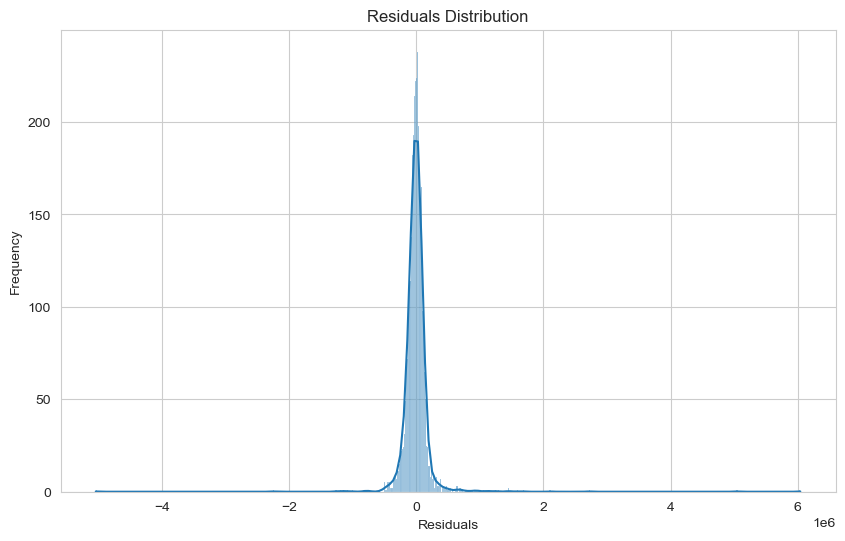

In [51]:
# Dependence
from scipy.stats import shapiro

# Perform Shapiro-Wilk normality test on residuals
stat, p_value = shapiro(residuals)
print(f'Statistics={stat}, p={p_value}')

# Visualize Residual Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Analysis

- **Statistics:** 0.45365045345415345. The closer this value is to 1, the more the data approximates a normal distribution. The current value is much less than 1, indicating that the residuals significantly deviate from a normal distribution.

- **p-value:** 2.558233596914786e-70. This value is extremely small, far below common significance levels (such as 0.05), so we reject the null hypothesis that the residuals follow a normal distribution. This suggests that the residuals do not conform to a normal distribution and indicates potential deficiencies in the model, which may require further optimization or adoption of another model.


### Levene Test（方差齐性检验）

- Null hypothesis (H0): The variances of the data groups are equal (homogeneity of variance).
- Alternative hypothesis (H1): The variances of the data groups are not equal (heterogeneity of variance).


Statistics=4.882641352373401, p=0.02716527724442357


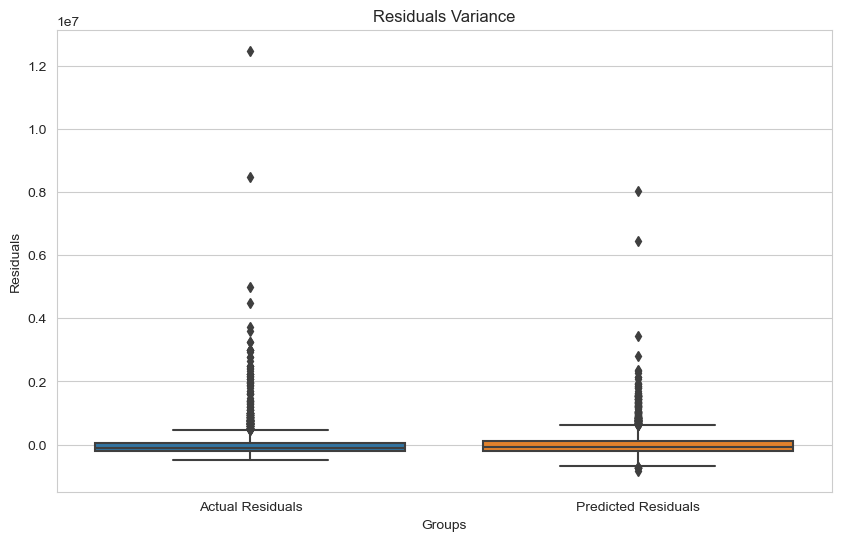

In [52]:
from scipy.stats import levene

# Calculate the residuals of actual values and predicted values separately.
residuals_actual = y_test - y_test.mean()
residuals_pred = y_pred - y_pred.mean()

# Levene Test
stat, p_value = levene(residuals_actual, residuals_pred)
print(f'Statistics={stat}, p={p_value}')

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=[residuals_actual, residuals_pred])
plt.title('Residuals Variance')
plt.xlabel('Groups')
plt.ylabel('Residuals')
plt.xticks([0, 1], ['Actual Residuals', 'Predicted Residuals'])
plt.show()

#### Observation and Analysis

1. **p-value**: A p-value less than 0.05 indicates a significant difference between the variance of actual residuals and predicted residuals. This means that the model may not have effectively captured the variance characteristics of the data.

2. **Visualization**: From the graph, it can be seen that there is a different distribution between actual residuals and predicted residuals. The predicted residuals are more concentrated, while actual residuals have more outliers, which also supports the conclusion of unequal variances.

Therefore, there is a deficiency in how well the model captures data variance characteristics, necessitating improvements to the model or further processing of data features.

### T-Test（均值T检验）

- Null hypothesis (H0): The means of the two independent samples are equal.
- Alternative hypothesis (H1): The means of the two independent samples are not equal.

Statistics=-2.3536117888057814e-15, p=0.9999999999999981


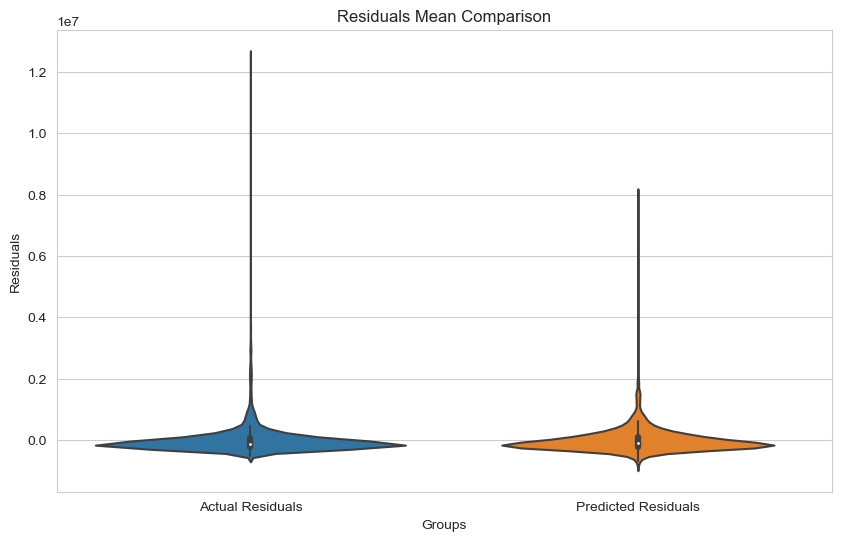

In [53]:
from scipy.stats import ttest_ind

# T-Test
stat, p_value = ttest_ind(residuals_actual, residuals_pred)
print(f'Statistics={stat}, p={p_value}')

# Visualization
plt.figure(figsize=(10, 6))
sns.violinplot(data=[residuals_actual, residuals_pred])
plt.title('Residuals Mean Comparison')
plt.xlabel('Groups')
plt.ylabel('Residuals')
plt.xticks([0, 1], ['Actual Residuals', 'Predicted Residuals'])
plt.show()

### Observation and Analysis

- **Statistics:** -2.3536117888057814e-15
- **p-value:** 0.9999999999999981

The t-test results show that the p-value is much greater than 0.05, indicating no significant difference between the mean of actual residuals and predicted residuals. This means that at the mean level, actual residuals and predicted residuals are similar.

### Observation and Analysis

#### Shapiro-Wilk Test

- **Statistic:** 0.45365045345415345
- **p-value:** 2.558233596914786e-70

The results show an extremely low p-value, much less than 0.05, indicating that the residual distribution significantly deviates from normality. We cannot assume that the residuals are normally distributed.

#### Levene Test

- **Statistic:** 4.882641352373401
- **p-value:** 0.02716527724442357

The Levene test results show a p-value less than 0.05, indicating a significant difference in variance between actual and predicted residuals. We cannot assume equal variances for the two groups of data.

#### T-Test

- **Statistic:** -2.3536117888057814e-15
- **p-value:** 0.9999999999999981

The t-test results show a p-value much greater than 0.05, indicating no significant difference in means between actual and predicted residuals at the mean level; they are similar.

#### Conclusion

Combining these test results, although actual and predicted residuals are similar in terms of mean values, their distributions do not meet the normality assumption and have significantly different variances. This suggests that there may be systematic errors or deficiencies in the model, requiring further optimization or trying other models.
